In [66]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

df = pd.read_csv("../data/raw_windowed.csv")

ibov = df[df['type'] == 'ibov'].dropna()
ibov['log_return'] = np.log10(ibov['return'])
cdi = df[df['type'] == 'cdi'].dropna()
cdi['log_return'] = np.log10(cdi['return'])

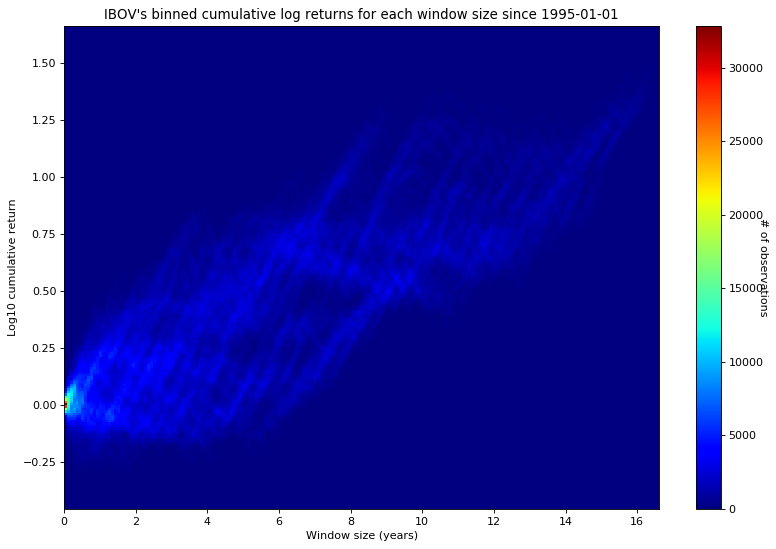

In [126]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.hist2d(ibov['window_size'] / 365, ibov['log_return'], bins=(200, 200), cmap=plt.cm.jet)
clbar = plt.colorbar()
clbar.ax.set_ylabel('# of observations', rotation=270)
plt.title('IBOV\'s binned cumulative log returns for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Log10 cumulative return')
plt.show()

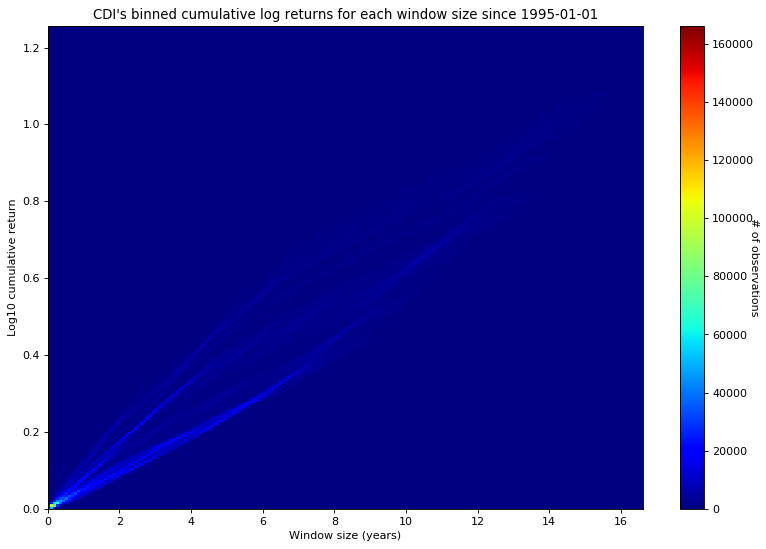

In [127]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.hist2d(cdi['window_size'] / 365, cdi['log_return'], bins=(200, 200), cmap=plt.cm.jet)
clbar = plt.colorbar()
clbar.ax.set_ylabel('# of observations', rotation=270)
plt.title('CDI\'s binned cumulative log returns for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Log10 cumulative return')
plt.show()

In [123]:
diff_records = []

for window_size in ibov.window_size.unique():
    ibov_tax = 1 - 0.15
    
    if window_size <= 180:
        cdi_tax = 1 - 0.225
    elif window_size <= 360:
        cdi_tax = 1 - 0.2
    elif window_size <= 720:
        cdi_tax = 1 - 0.175
    else:
        cdi_tax = 1 - 0.15
        
    ibov_return = ibov[ibov['window_size'] == window_size]['return'].mean()
    
    an_ibov_return = ibov_return ** (365 / window_size) - 1
    
    cdi_return = cdi[cdi['window_size'] == window_size]['return'].mean()
    
    an_cdi_return = cdi_return ** (365 / window_size) - 1
        
    ibov_taxed_return = np.mean(
        [((x - 1) * ibov_tax + 1) if x > 1 else x 
         for x in ibov[ibov['window_size'] == window_size]['return']])
    
    an_ibov_taxed_return = ibov_taxed_return ** (365 / window_size) - 1
    
    cdi_taxed_return = np.mean(
        [((x - 1) * cdi_tax + 1) if x > 1 else x 
        for x in cdi[cdi['window_size'] == window_size]['return']])
    
    an_cdi_taxed_return = cdi_taxed_return ** (365 / window_size) - 1
    
    
    diff_records.append({
        'window_size': window_size, 
        'ibov_cdi_diff': an_ibov_return - an_cdi_return,
        'ibov_cdi_taxed_diff': an_ibov_taxed_return - an_cdi_taxed_return,
    })
    
avg_mean_diff = pd.DataFrame(diff_records)

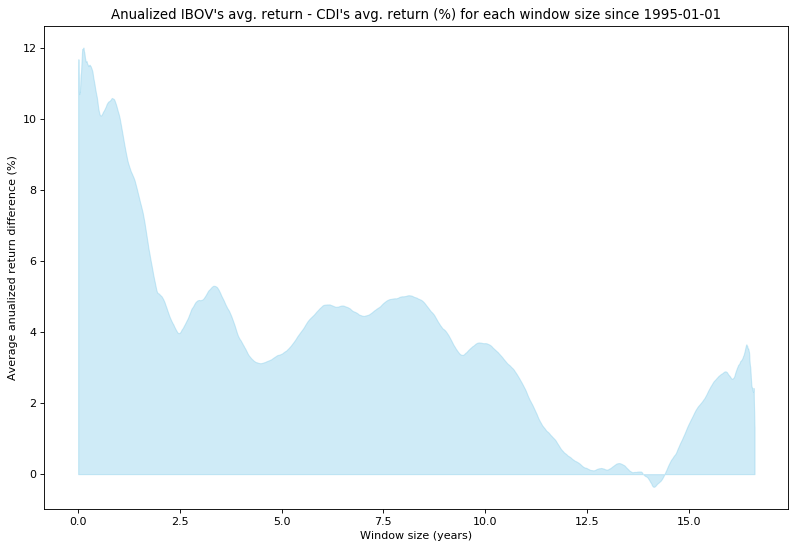

In [128]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.fill_between(
    avg_mean_diff['window_size'] / 365, avg_mean_diff['ibov_cdi_diff'] * 100, 
    color="skyblue", alpha=0.4)

plt.title('Anualized IBOV\'s avg. return - CDI\'s avg. return (%) for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Average anualized return difference (%)')
plt.show()

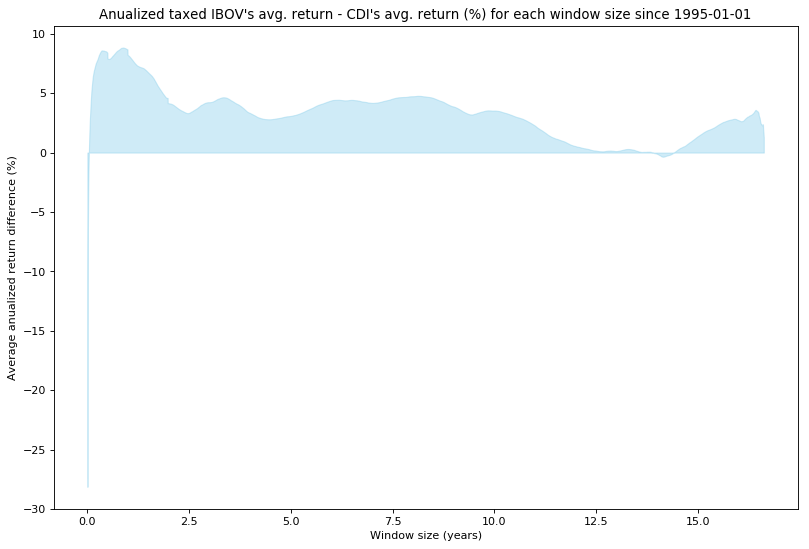

In [129]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.fill_between(
    avg_mean_diff['window_size'] / 365, avg_mean_diff['ibov_cdi_taxed_diff'] * 100, 
    color="skyblue", alpha=0.4)

plt.title('Anualized taxed IBOV\'s avg. return - CDI\'s avg. return (%) for each window size since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Average anualized return difference (%)')
plt.show()

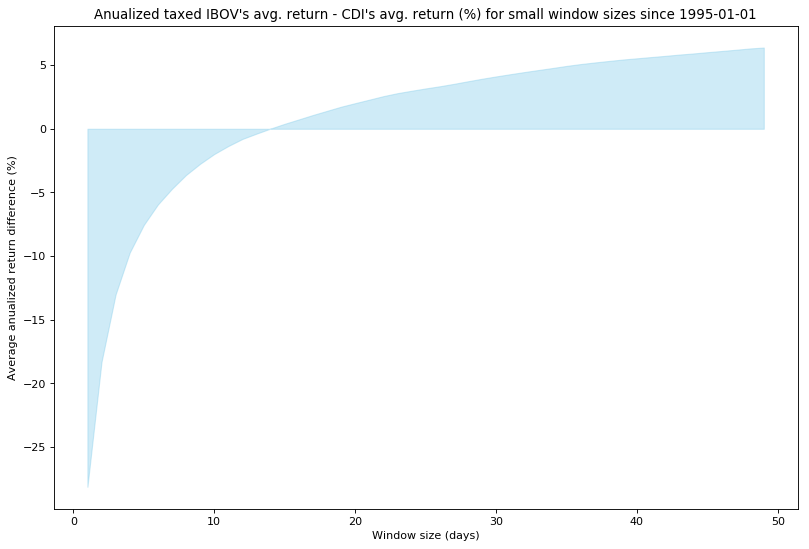

In [132]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

small_windows = avg_mean_diff[avg_mean_diff['window_size'] < 50]

plt.fill_between(
    small_windows['window_size'], small_windows['ibov_cdi_taxed_diff'] * 100, 
    color="skyblue", alpha=0.4)

plt.title('Anualized taxed IBOV\'s avg. return - CDI\'s avg. return (%) for small window sizes since 1995-01-01')
plt.xlabel('Window size (days)')
plt.ylabel('Average anualized return difference (%)')
plt.show()

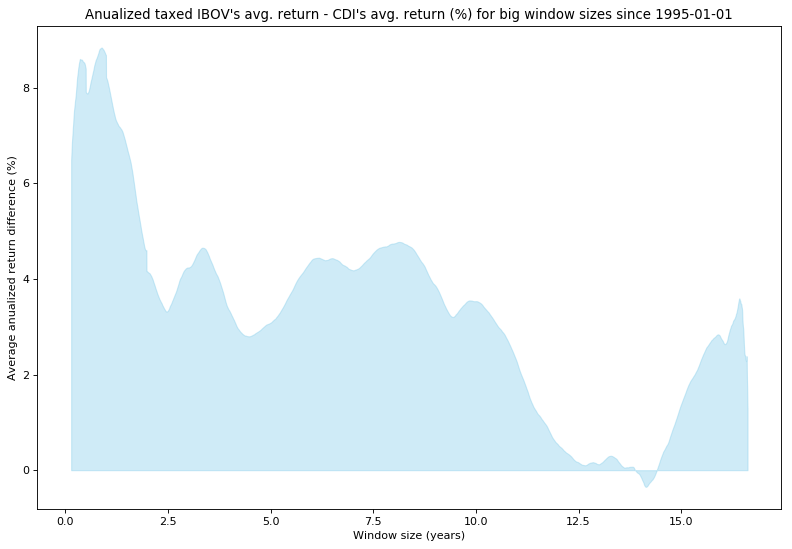

In [133]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

big_windows = avg_mean_diff[avg_mean_diff['window_size'] > 50]

plt.fill_between(
    big_windows['window_size'] / 365, big_windows['ibov_cdi_taxed_diff'] * 100, 
    color="skyblue", alpha=0.4)

plt.title('Anualized taxed IBOV\'s avg. return - CDI\'s avg. return (%) for big window sizes since 1995-01-01')
plt.xlabel('Window size (years)')
plt.ylabel('Average anualized return difference (%)')
plt.show()